In [1]:
import os
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw, rdFMCS
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.decomposition import PCA

from geom3d.train_models import *
import torch
import copy
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/performance_eval_test/SchNet_IP_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/80Kdataset.pt"
dataset = torch.load(dataset_path)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000


In [3]:
#why is dataset type list?

dataset

[Data(x=[69], y=-8.769000053405762, positions=[69, 3], InChIKey='GUHPJJDNBLEPFG-UHFFFAOYSA-N'),
 Data(x=[93], y=-8.496899604797363, positions=[93, 3], InChIKey='AYKWIKCFFPEIRC-UHFFFAOYSA-N'),
 Data(x=[147], y=-9.899999618530273, positions=[147, 3], InChIKey='CCTZVUFBMUDPRS-UHFFFAOYSA-N'),
 Data(x=[127], y=-10.69789981842041, positions=[127, 3], InChIKey='ZFCVPMKOIMXOMC-UHFFFAOYSA-N'),
 Data(x=[118], y=-11.39050006866455, positions=[118, 3], InChIKey='YOUVGTYSMXXLCR-JNEBBEIESA-N'),
 Data(x=[128], y=-10.453800201416016, positions=[128, 3], InChIKey='DGUHSHHZKSPRSC-UHFFFAOYSA-N'),
 Data(x=[114], y=-10.07979965209961, positions=[114, 3], InChIKey='JEPNDRWSZQFIJP-UHFFFAOYSA-N'),
 Data(x=[121], y=-11.066900253295898, positions=[121, 3], InChIKey='SMIQPQFCBSBIJH-IREJBKPGSA-N'),
 Data(x=[117], y=-11.025899887084961, positions=[117, 3], InChIKey='SXOSWYXOXRPBDD-KOLAZIDVSA-N'),
 Data(x=[129], y=-6.258399963378906, positions=[129, 3], InChIKey='KDFZWLYNLLKITL-UHFFFAOYSA-N'),
 Data(x=[111], y=-11.

In [4]:
import numpy as np

# Get the target column 'y' from each dictionary in the list
target = np.array([data['y'] for data in dataset])

# Sort the target values and get the indices
sorted_indices = np.argsort(target)

# Get the indices of the 10% best performing molecules
test_indices = sorted_indices[-int(len(sorted_indices) * 0.1) :]

# find the InChIKeys of the test set
test_set = [dataset[i] for i in test_indices]
test_set_inchikeys = [data["InChIKey"] for data in test_set]


In [5]:
test_set_inchikeys

['GPFFYACNGJTVKW-UHFFFAOYSA-N',
 'JWULBSIOENCUQE-XTRPLKJHSA-N',
 'PBJLWZVGASMIAK-DTASFGGXSA-N',
 'RUOTYIUUHJBSGH-HSRNTDFQSA-N',
 'BCJPEXSUWFLPJR-UHFFFAOYSA-N',
 'FMBHHGRHJDDNEQ-IRWBXMRWSA-N',
 'LTUFFOJBOLLQFV-HTVDVWKISA-N',
 'KZXHDZYZAFOJMI-UHFFFAOYSA-N',
 'LWLXKFFUWZWLRB-UHFFFAOYSA-N',
 'KWRCANVGUCONQO-JRZNSJKLSA-N',
 'MJQYXOZUQCABSK-RODHXAHZSA-N',
 'GFMPBQZXNJOGQZ-UHFFFAOYSA-N',
 'FKATVHWJNZUREI-UHFFFAOYSA-N',
 'DBCFCEJBQSVDKO-UHFFFAOYSA-N',
 'QBQJHBNBLAUJOR-COCVTVQSSA-N',
 'RMBPOHMHBHWVGW-GYLGGJJYSA-N',
 'XJYGRCXZTQAMAF-YEOLPZPCSA-N',
 'GPJXGPXLXPRCDK-UHFFFAOYSA-N',
 'SWKOGBPRBMNEFM-XLDFTUSDSA-N',
 'DQOHRTXHCPMPKG-FZSDHLTPSA-N',
 'RPFKWQSYBQXDDN-UHFFFAOYSA-N',
 'AWPUMCUUSFYVFY-UQVGWZNISA-N',
 'QVKFIMMSFYDWSV-UHFFFAOYSA-N',
 'DDLIYJATUQWSKM-FLSCVOFKSA-N',
 'OCDIKJIAAWRHSB-UHFFFAOYSA-N',
 'XSSOPYLRKPLWCV-BZFSWPTRSA-N',
 'KHZJAEIKPWOICW-OCUJFKKWSA-N',
 'IHZFJSPJOJWIFT-KGVVOSDVSA-N',
 'ORRRSVZDYZLYKA-SETIRSJTSA-N',
 'GLUPASQYEXHFIR-UHFFFAOYSA-N',
 'YTPUAGUVKAWDPX-UHFFFAOYSA-N',
 'ILVLCE

In [12]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

top_target_splitter(dataset, config)

top 10% in the test set. The target value is IP (5.5eV).


['KGGKNDUEDJTJOZ-VOVXCRLKSA-N',
 'GNKYEKXPAMMUCR-PMHDSTOGSA-N',
 'PASPOQDOZNPTJT-UHFFFAOYSA-N',
 'IFOHFOOEYUJWMY-YTJQMYRNSA-N',
 'IWLKHOBAEAUFHP-TZRCHIKKSA-N',
 'AYBCJSAAKGIQCP-FXJQXFMUSA-N',
 'LVNRICMRNRQHEJ-KVYSUAELSA-N',
 'QOCJGAGJVYEMSI-VLLXYDBRSA-N',
 'UVQGQEZNOXXJTJ-RCXMRBRQSA-N',
 'IXGJGUZWWVFBKO-RMOUTILPSA-N',
 'WERLSQHRQWZJNC-DPORGUCASA-N',
 'ILNMIUPLLRMUNK-FZPRHHONSA-N',
 'QEUHUASJNGLFOX-DKEBBPCISA-N',
 'IIYZVNMDJRZRNJ-RMOUTILPSA-N',
 'UHHANLBHIKNKMC-RZAAZZIUSA-N',
 'JTUWEIVWDWRBML-LEAOOLAISA-N',
 'YHGZABCPXYJPJK-IPHFVPNQSA-N',
 'CWGJCMLGMONALV-WOAKIUINSA-N',
 'OLHLBHJGBOCTKR-DIACVZSRSA-N',
 'UHCAIAJUZBVQGJ-NVQZDOMMSA-N',
 'AENPBZURNKMXDH-KFFOQRAHSA-N',
 'PDDDOCWOOCTJEG-XUOXJPJFSA-N',
 'YRXQFRYUTUOHIA-NXZPWOQSSA-N',
 'OAIOOOGNUFELPI-OTAFKVFBSA-N',
 'KTARXXZBNZBJTH-WIMUOEIGSA-N',
 'YMWQLJHQPXZOGY-HQUYMWSHSA-N',
 'FCHJPJRCZQMXRJ-ZCWAXRIBSA-N',
 'UINTZGYTEBXRRF-GLSLVLJQSA-N',
 'JMSZNGIOEYBEMS-ILVXIXLLSA-N',
 'LKOZLSIYGWQNFZ-UHFFFAOYSA-N',
 'JAYKESNLPJJMRO-RODHXAHZSA-N',
 'BGAUMU

top 10% in the test set. The target value is IP (5.5eV).
target_name: IP


Generating substructures for top 10% wrt target:   0%|          | 0/8000 [00:00<?, ?it/s]

representative oligomer in top 10%


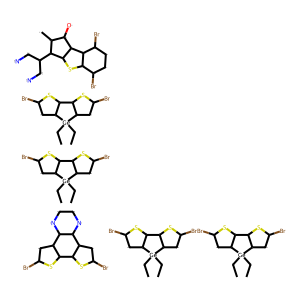

Generating substructures for top 10% wrt target: 100%|██████████| 8000/8000 [05:24<00:00, 24.67it/s]


Top 1 Substructure (Frequency: 2774 oligomers):


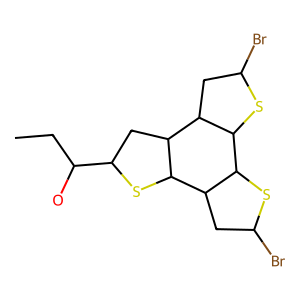

Top 2 Substructure (Frequency: 857 oligomers):


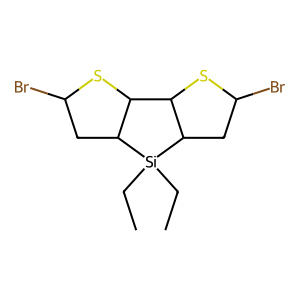

Top 3 Substructure (Frequency: 486 oligomers):


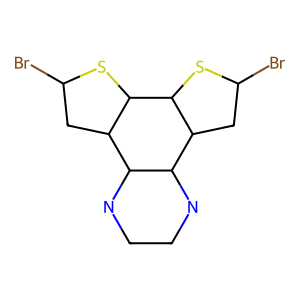

In [19]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

substructure_analysis_top_target(dataset, config)

In [2]:
import os
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs, Draw, rdFMCS
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.decomposition import PCA

from geom3d.train_models import *
import torch
import copy
import os
os.chdir('/rds/general/user/cb1319/home/GEOM3D/Geom3D/')
config_dir = os.getcwd()+"/performance_eval_test/SchNet_IP_80000"
config = read_config(config_dir)

dataset_path = "/rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/80Kdataset.pt"
dataset = torch.load(dataset_path)

config loaded from /rds/general/user/cb1319/home/GEOM3D/Geom3D/performance_eval_test/SchNet_IP_80000


In [4]:
%matplotlib inline

Dataset file found in df_total
splitting group 1 10% of dataset into equal val and test set. The target value is IP.


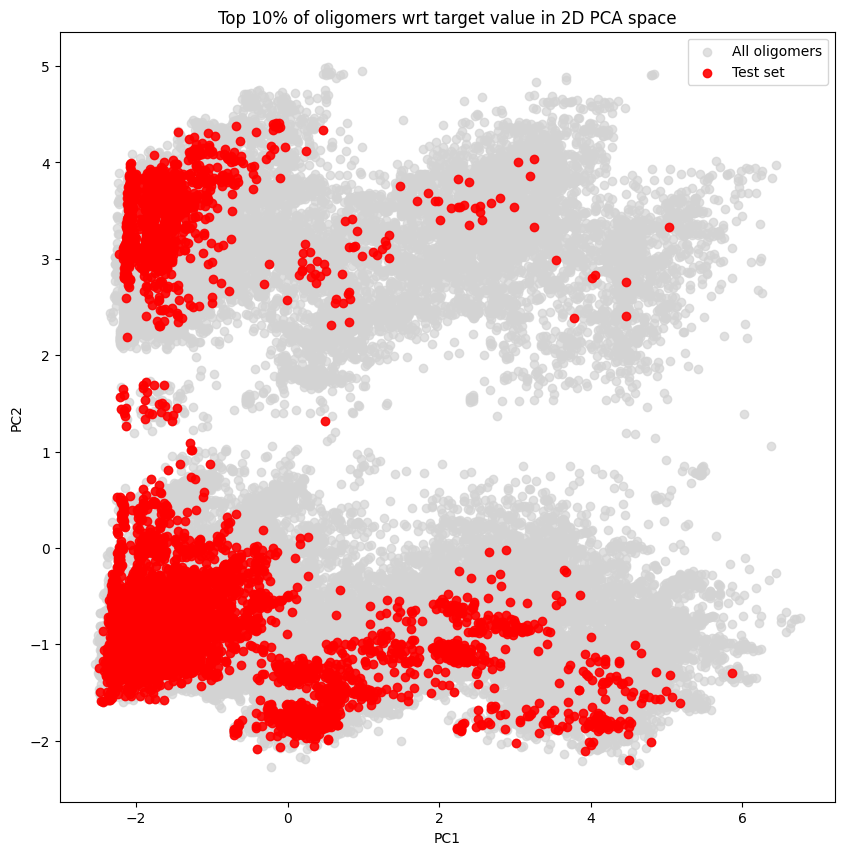

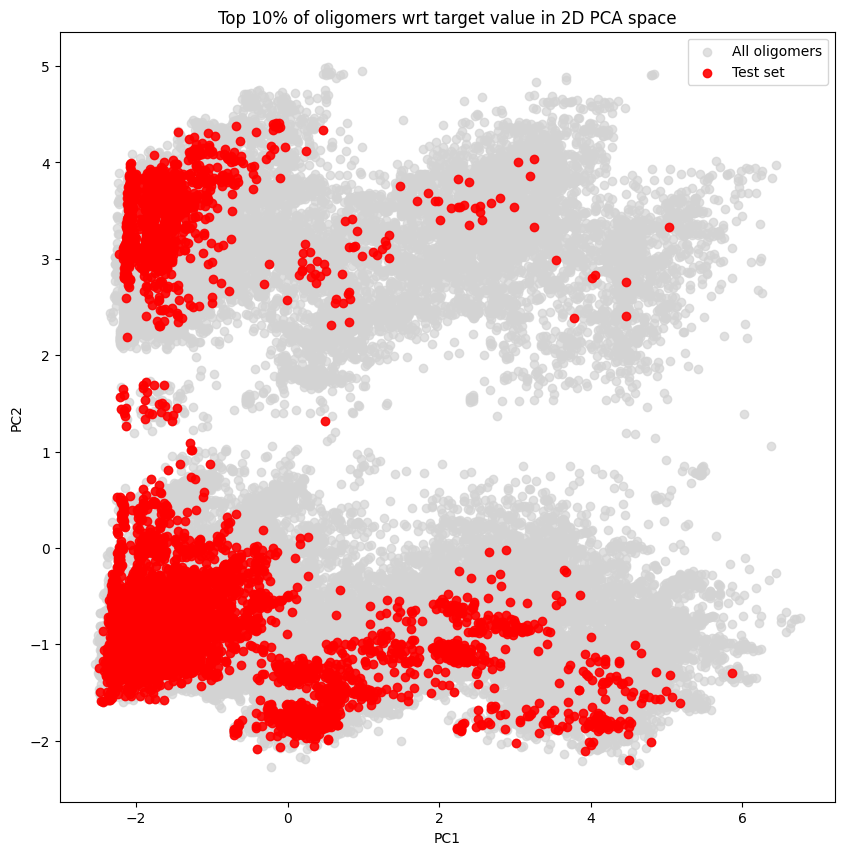

In [5]:
import importlib
from geom3d.utils import top_target_split
from geom3d.utils.top_target_split import *

importlib.reload(top_target_split)

target_plot(dataset, config)